In [163]:
#ALGORITHM = 'Neural Network'
ALGORITHM = 'Neural Network [TYPE]'
ALGORITHM_DETAIL = ''
ALGORITHM_DETAIL_ORIG = ALGORITHM_DETAIL
#ALGORITHM_DETAIL += ' tbc'
DATA_DETAIL = []
#DATA_DETAIL = ['no scale','no dummies']
VERSION = '10'

RANDOM_STATE = 101
TRAINING_SIZE = 0.9

CROSS_VALIDATION_SCORING = 'r2'

price_divisor = 1

#selected_neural_network='simplest'
#selected_neural_network='quite simple'
#selected_neural_network='recommended simple v2'
#selected_neural_network='adapted v3'


# ---- FIRST NEURAL NETWORK STRUCTURE DEFINITION ---- # 
#selected_neural_network = 'recommended simple v1'
#selected_nn_code = 'm01 simple'

# ---- 2nd NEURAL NETWORK STRUCTURE DEFINITION ---- # 
#selected_neural_network = selected_nn_code = "m02 two layers"


# ---- 3rd NEURAL NETWORK STRUCTURE DEFINITION ---- # 
#selected_neural_network = selected_nn_code = "m03 2 layers+wider"


# ---- 4th NEURAL NETWORK STRUCTURE DEFINITION ---- # 
#selected_neural_network = selected_nn_code = "m04 3 layers+wider"

# ---- 5th NEURAL NETWORK STRUCTURE DEFINITION ---- # 
#selected_neural_network = selected_nn_code = "m05 rec deep"

# ---- 6th NEURAL NETWORK STRUCTURE DEFINITION ---- # 
#selected_neural_network = selected_nn_code = "m05 my deep"

#selected_neural_network = selected_nn_code = ""

# ---- 7th NEURAL NETWORK STRUCTURE DEFINITION ---- #
#selected_neural_network = selected_nn_code = "m11 mega"

# ---- 8th NEURAL NETWORK STRUCTURE DEFINITION ---- #
#selected_neural_network = selected_nn_code = "m12 mega"

# ---- 9th NEURAL NETWORK STRUCTURE DEFINITION ---- #
#selected_neural_network = selected_nn_code = "m13 mega"

# ---- 10th NEURAL NETWORK STRUCTURE DEFINITION ---- #
selected_neural_network = selected_nn_code = "m14 mega"



ALGORITHM = ALGORITHM.replace("[TYPE]", selected_nn_code)

<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage: loading all dependencies



In [164]:
#! pip install scikeras
#! pip install catboost

<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage: creating the ANN model



<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from scikeras.wrappers import KerasClassifier, KerasRegressor

import tensorflow as tf
from keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

print("Tensorflow version:", tf.__version__)

loss_dict = {
    "mean_squared_error":'mse',
    "mean_absolute_error":'mae'
            }

def make_simple_ann(key, inputs=-1):
    if False:
        pass
    elif key == 'quite simple':

        new_algorithm_detail = ALGORITHM_DETAIL_ORIG + 'quite simple model + normalise, mse'

        learn_rate = 0.1
        epochs, chosen_loss = 100, 'mean_squared_error'
        
        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))

        chosen_model = tf.keras.Sequential([
            layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
            normalizer,
            layers.Dense(units=1)
        ])

    elif key == 'recommended simple v1':

        learn_rate = 0.003 #0.3
        epochs, chosen_loss = 50, 'mean_squared_error'
        
        new_algorithm_detail = ALGORITHM_DETAIL_ORIG + 'recommended simple model/mse'

        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))

        chosen_model = tf.keras.Sequential([
            layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
            normalizer,
            layers.Dense(units=1)
        ])

    elif key == 'm02 two layers':

        learn_rate = 0.003 #0.3
        epochs, chosen_loss = 500, 'mean_squared_error'

        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))

        chosen_model = tf.keras.Sequential([
            layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
            normalizer,
            layers.Dense(X_train.shape[1], activation='relu'),
            layers.Dense(units=1)
        ])

        
    elif key == 'm03 2 layers+wider':

        learn_rate = 0.0003 # 0.003 #0.3
        epochs, chosen_loss = 500, 'mean_squared_error'
        
        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))

        chosen_model = tf.keras.Sequential([
            layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
            normalizer,
            layers.Dense(30, activation='relu'),
            layers.Dense(units=1)
        ])

    elif key == 'm04 3 layers+wider':

        learn_rate = 0.003
        epochs, chosen_loss = 500, 'mean_squared_error'

        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))

        chosen_model = tf.keras.Sequential([
            layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
            normalizer,
            layers.Dense(30, activation='relu'),
            layers.Dense(40, activation='relu'),
            layers.Dense(units=1)
        ])

    elif key == 'm0x four layers,wider,batchnorm':

        learn_rate = 0.0003 #0.3
        epochs, chosen_loss = 500, 'mean_squared_error'
        
        #from layers.normalization import BatchNormalization
        
        normalizer = tf.keras.layers.Normalization(axis=-1)
        batchnorm = layers.BatchNormalization()
        activation = layers.Activation('relu')
        
        normalizer.adapt(np.array(X_train))
        #new_algorithm_detail += ' +norm'

        chosen_model = tf.keras.Sequential([
            layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'),
            #normalizer,
            layers.Dense(30, activation='relu'),
            batchnorm,
            activation,
            layers.Dense(40, activation='relu'),
            layers.Dense(30, activation='relu'),
            layers.Dense(units=1)
        ])

    elif key == 'm05 rec deep':
        chosen_model = Sequential()

        # The Input Layer :
        chosen_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

        # The Hidden Layers :
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

        # The Output Layer :
        chosen_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

        # Compile the network :
        #chosen_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

        learn_rate = 0.0003 #0.3
        epochs, chosen_loss = 500, 'mean_squared_error'

    elif key == 'm11 mega':
        chosen_model = Sequential()

        # The Input Layer :
        chosen_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

        # The Hidden Layers :
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(2148, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(2148, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

        # The Output Layer :
        chosen_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

        # Compile the network :
        #chosen_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

        learn_rate = 0.0003
        epochs, chosen_loss = 400, 'mean_squared_error'

    elif key == 'm12 mega':
        chosen_model = Sequential()

        # The Input Layer :
        chosen_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

        # The Hidden Layers :
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

        # The Output Layer :
        chosen_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

        # Compile the network :
        #chosen_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

        learn_rate = 0.0003
        epochs, chosen_loss = 400, 'mean_squared_error'
    elif key == 'm13 mega':
        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))
        #normalizer.adapt(np.array(128))

        chosen_model = Sequential()

        # The Input Layer :
        chosen_model.add(normalizer),
        chosen_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


        # The Hidden Layers :
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
        chosen_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

        # The Output Layer :
        chosen_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

        learn_rate = 0.0003
        epochs = 400
        chosen_loss = 'mean_absolute_error' # 'mean_squared_error'

    elif key == 'm14 mega':
        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(X_train))
        batchnorm = layers.BatchNormalization()
        activation = layers.Activation('relu')

        chosen_model = Sequential()

        # The Input Layer :
        chosen_model.add(normalizer)
        chosen_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


        # The Hidden Layers :
        chosen_model.add(Dense(256, kernel_initializer='normal'))
        chosen_model.add(layers.BatchNormalization())
        chosen_model.add(activation)
        chosen_model.add(Dense(512, kernel_initializer='normal'))
        chosen_model.add(layers.BatchNormalization())
        chosen_model.add(activation)
        chosen_model.add(Dense(1024, kernel_initializer='normal'))
        chosen_model.add(layers.BatchNormalization())
        chosen_model.add(activation)
        chosen_model.add(Dense(1024, kernel_initializer='normal'))
        chosen_model.add(layers.BatchNormalization())
        chosen_model.add(activation)
        chosen_model.add(Dense(512, kernel_initializer='normal'))
        chosen_model.add(layers.BatchNormalization())
        chosen_model.add(activation)
        chosen_model.add(Dense(256, kernel_initializer='normal'))
        chosen_model.add(layers.BatchNormalization())
        chosen_model.add(activation)

        # The Output Layer :
        chosen_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

        learn_rate = 0.0003
        epochs = 400
        chosen_loss = 'mean_absolute_error' # 'mean_squared_error'

    else:
        raise ValueError("make_simple_ann: no entry for key:", key)

    if run_env == 'local':
        epochs = 5

    # Compile the network :
    chosen_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),
        loss=chosen_loss)


    new_algorithm_detail = ALGORITHM_DETAIL_ORIG + loss_dict[chosen_loss]
    new_algorithm_detail += f' +epochs={epochs}'
    new_algorithm_detail += f' +learn={learn_rate}'
    
    return chosen_model, new_algorithm_detail, epochs, {'learning_rate':learn_rate}

#make_simple_ann('m04 four layers,wider,batchnorm')

Tensorflow version: 2.9.1


<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage: loading all dependencies



In [166]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import numpy as np
from pandas import DataFrame
import math
from termcolor import colored
from time import time
import sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import pickle

import json
from datetime import datetime
import matplotlib.pyplot as plt

with open('../../z_envs/_envs.json') as f:
    env_vars = json.loads(f.read())
print(env_vars)

try:
    import google.colab

    run_env = 'colab'
except:
    try:
        run_env = env_vars['notebook_environment']
    except:
        run_env = 'unknown'

use_gpu = env_vars.get('use_gpu', False)
debug_mode = env_vars.get('debug_mode', False)
quick_mode = env_vars.get('quick_mode', False)

no_dummies = 'no dummies' in DATA_DETAIL
no_scaling = 'no scaling' in DATA_DETAIL
not_catboost = True

if run_env not in ['colab', 'gradient', 'cloud']:
    cloud_run = False
    from functions_0__common_20221116 import get_columns
    from functions_b__get_the_data_20221116 import set_csv_directory, get_combined_dataset
    from functions_d1__prepare_cleanse_data_20221116 import tidy_dataset
    from functions_d2__transform_enrich_data_20221116 import preprocess, feature_engineer
    from functions_d3__prepare_store_data_20221116 import create_train_test_data
    from functions_e__train_model_20221116 import get_chosen_model, make_modelling_pipeline, get_cv_params, fit_model_with_cross_validation, get_hyperparameters
    from functions_f_evaluate_model_20221116 import get_best_estimator_average_time, get_results, update_results

    set_csv_directory('final_split')

    quick_mode = True
else:
    cloud_run = True
    import sys
    import os

    module_path = os.path.abspath(os.path.join('..', '..', '..'))
    if module_path not in sys.path:
        #sys.path.append(module_path+"\\zfunctions")
        sys.path.append(module_path)

    from functions_0__common_20221116 import get_columns
    from functions_b__get_the_data_20221116 import set_csv_directory, get_combined_dataset
    from functions_d1__prepare_cleanse_data_20221116 import tidy_dataset
    from functions_d2__transform_enrich_data_20221116 import preprocess, feature_engineer
    from functions_d3__prepare_store_data_20221116 import create_train_test_data
    from functions_e__train_model_20221116 import get_chosen_model, make_modelling_pipeline, get_cv_params, fit_model_with_cross_validation, get_hyperparameters
    from functions_f_evaluate_model_20221116 import get_best_estimator_average_time, get_results, update_results


{'notebook_environment': 'gradient', 'use_gpu': True, 'debug_mode': False, 'quick_mode': False, 'quick_override_cv_splits': 2, 'quick_override_n_iter': 10, 'quick_override_n_jobs': 3}


<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage: get the data


In [167]:
#cutdown_rows = 1000
cutdown_rows = 0

LABEL = 'Price'

columns, booleans, floats, categories, custom, wildcard = get_columns(version=VERSION)

print(colored(f"features", "blue"), "-> ", columns)
columns.insert(0, LABEL)
print(colored(f"label", "green", None, ['bold']), "-> ", LABEL)

features ->  ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude', 'latitude_deviation', 'longitude_deviation', 'tenure.tenureType']
label ->  Price


In [168]:
def get_source_dataframe(rows=cutdown_rows, folder_prefix='../../../'):
    retrieval_type = None

    filename = f'df_listings_v{VERSION}.csv'
    remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'
    df_pathname_raw = folder_prefix + f'data/source/{filename}'
    df_pathname_tidy = folder_prefix + f'data/final/{filename}'

    if cloud_run:
        inDF = pd.read_csv(remote_pathname, on_bad_lines='error', index_col=0)
        retrieval_type = 'tidy'
        print('loaded data from', folder_prefix + remote_pathname)
    else:
        inDF = pd.read_csv(df_pathname_tidy, on_bad_lines='error', index_col=0)
        retrieval_type = 'tidy'
        print('loaded data from', df_pathname_tidy)

    if rows and rows > 0:
        inDF = inDF[:rows]
    return inDF, retrieval_type

In [169]:
df, retrieval_type = get_source_dataframe(folder_prefix='../../../')
df_orig = df.copy()

if retrieval_type != 'tidy':
    df = tidy_dataset(df, version=int(VERSION))
    df = feature_engineer(df, version=int(VERSION))

    df = df[columns]

print(df.shape)

loaded data from ../../../https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/df_listings_v10.csv
(46871, 59)


In [170]:
df['Price'] = df['Price'] / price_divisor # potentially making the price smaller to make the ANN perform better
if price_divisor!=1:
    print('dividing all Prices by', price_divisor)
    more_detail += f' div={price_divisor}'
df.head(30)

,Price,bedrooms,bathrooms,nearestStation,location.latitude,location.longitude,latitude_deviation,longitude_deviation,tenure.tenureType,feature__1 bedroom,...,feature__reception room,feature__separate kitchen,feature__share of freehold,feature__three bedrooms,feature__three double bedrooms,feature__top floor,feature__two bathrooms,feature__two bedrooms,feature__two double bedrooms,feature__two reception rooms
14520525,550000.0,3.0,1.0,0.274316,51.529950,-0.207020,0.030230,0.102600,LEASEHOLD,0,...,0,1,0,0,0,0,0,0,0,0
27953107,400000.0,2.0,2.0,0.305845,51.549390,-0.482600,0.049670,0.378180,LEASEHOLD,0,...,0,0,0,0,0,1,0,0,1,0
33593487,579950.0,2.0,1.0,0.438045,51.447180,-0.338770,0.052540,0.234350,FREEHOLD,0,...,0,0,0,0,0,0,0,0,0,0
35271294,370000.0,2.0,1.0,0.399307,51.449568,-0.140154,0.050152,0.035734,LEASEHOLD,0,...,0,0,0,0,0,0,0,0,0,0
35429088,599950.0,2.0,1.0,0.238187,51.577030,-0.141230,0.077310,0.036810,NaN,0,...,0,0,0,0,0,0,0,0,0,0
44749111,475000.0,2.0,1.0,0.410550,51.370050,-0.212410,0.129670,0.107990,FREEHOLD,0,...,0,0,0,0,0,0,0,0,0,0
46204665,435000.0,3.0,2.0,0.314779,51.539070,-0.198935,0.039350,0.094515,LEASEHOLD,0,...,0,0,0,1,0,0,0,0,0,0
49020666,200000.0,1.0,1.0,0.875911,51.539959,-0.380863,0.040239,0.276443,LEASEHOLD,0,...,0,0,0,0,0,0,0,0,0,0
49036279,275000.0,2.0,1.0,0.474368,51.541780,0.037890,0.042060,0.142310,LEASEHOLD,0,...,0,0,0,0,0,0,0,0,0,0
49303873,450000.0,3.0,2.0,0.577040,51.524880,0.187200,0.025160,0.291620,FREEHOLD,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df.isnull().sum()

Price                                    0
bedrooms                                 0
bathrooms                                0
nearestStation                           0
location.latitude                        0
location.longitude                       0
latitude_deviation                       0
longitude_deviation                      0
tenure.tenureType                     2744
feature__1 bedroom                       0
feature__2 bedrooms                      0
feature__2 double bedrooms               0
feature__allocated parking               0
feature__allocated parking space         0
feature__balcony                         0
feature__bathroom                        0
feature__chain free                      0
feature__close to local amenities        0
feature__communal garden                 0
feature__communal gardens                0
feature__double bedroom                  0
feature__double glazed                   0
feature__double glazing                  0
feature__ep

In [172]:
df.info()
df.describe()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46871 entries, 14520525 to 126181118
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price                               46871 non-null  float64
 1   bedrooms                            46871 non-null  float64
 2   bathrooms                           46871 non-null  float64
 3   nearestStation                      46871 non-null  float64
 4   location.latitude                   46871 non-null  float64
 5   location.longitude                  46871 non-null  float64
 6   latitude_deviation                  46871 non-null  float64
 7   longitude_deviation                 46871 non-null  float64
 8   tenure.tenureType                   44127 non-null  object 
 9   feature__1 bedroom                  46871 non-null  int64  
 10  feature__2 bedrooms                 46871 non-null  int64  
 11  feature__2 double bedrooms    

,count,mean,std,min,25%,50%,75%,max
Price,46871.0,425069.390775,107227.324906,100000.000000,349950.000000,425000.000000,515000.000000,600000.000000
bedrooms,46871.0,1.992469,0.828837,1.000000,1.000000,2.000000,3.000000,7.000000
bathrooms,46871.0,1.182074,0.409879,1.000000,1.000000,1.000000,1.000000,5.000000
nearestStation,46871.0,0.438847,0.325942,0.000000,0.227169,0.367971,0.559620,7.197700
location.latitude,46871.0,51.497049,0.077085,51.298317,51.438861,51.499977,51.556183,51.683185
location.longitude,46871.0,-0.113269,0.156489,-0.498315,-0.210796,-0.102230,-0.010343,0.279726
latitude_deviation,46871.0,0.064317,0.042573,0.000000,0.028876,0.058595,0.094362,0.201403
longitude_deviation,46871.0,0.124202,0.095607,0.000000,0.043560,0.098984,0.192684,0.393895
feature__1 bedroom,46871.0,0.010838,0.103542,0.000000,0.000000,0.000000,0.000000,1.000000
feature__2 bedrooms,46871.0,0.015169,0.122402,0.000000,0.000000,0.000000,0.000000,2.000000


In [173]:
old_length = len(df)

df = preprocess(df, version=VERSION)

print(f"dataframe contract due to cleaning: {old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

dataframe contract due to cleaning: 46871 ==> 46871


,count,mean,std,min,25%,50%,75%,max
Price,46871.0,425069.390775,107227.324906,100000.000000,349950.000000,425000.000000,515000.000000,600000.000000
bedrooms,46871.0,1.992469,0.828837,1.000000,1.000000,2.000000,3.000000,7.000000
bathrooms,46871.0,1.182074,0.409879,1.000000,1.000000,1.000000,1.000000,5.000000
nearestStation,46871.0,0.438847,0.325942,0.000000,0.227169,0.367971,0.559620,7.197700
location.latitude,46871.0,51.497049,0.077085,51.298317,51.438861,51.499977,51.556183,51.683185
location.longitude,46871.0,-0.113269,0.156489,-0.498315,-0.210796,-0.102230,-0.010343,0.279726
latitude_deviation,46871.0,0.064317,0.042573,0.000000,0.028876,0.058595,0.094362,0.201403
longitude_deviation,46871.0,0.124202,0.095607,0.000000,0.043560,0.098984,0.192684,0.393895
feature__1 bedroom,46871.0,0.010838,0.103542,0.000000,0.000000,0.000000,0.000000,1.000000
feature__2 bedrooms,46871.0,0.015169,0.122402,0.000000,0.000000,0.000000,0.000000,2.000000


In [174]:
df.isna().sum()

Price                                    0
bedrooms                                 0
bathrooms                                0
nearestStation                           0
location.latitude                        0
location.longitude                       0
latitude_deviation                       0
longitude_deviation                      0
tenure.tenureType                     2744
feature__1 bedroom                       0
feature__2 bedrooms                      0
feature__2 double bedrooms               0
feature__allocated parking               0
feature__allocated parking space         0
feature__balcony                         0
feature__bathroom                        0
feature__chain free                      0
feature__close to local amenities        0
feature__communal garden                 0
feature__communal gardens                0
feature__double bedroom                  0
feature__double glazed                   0
feature__double glazing                  0
feature__ep

In [175]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

46871 ==> 44127


,Price,bedrooms,bathrooms,nearestStation,location.latitude,location.longitude,latitude_deviation,longitude_deviation,feature__1 bedroom,feature__2 bedrooms,...,feature__reception room,feature__separate kitchen,feature__share of freehold,feature__three bedrooms,feature__three double bedrooms,feature__top floor,feature__two bathrooms,feature__two bedrooms,feature__two double bedrooms,feature__two reception rooms
count,44127.000000,44127.000000,44127.00000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,...,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000
mean,425224.642373,1.990981,1.18134,0.438522,51.496711,-0.113106,0.064544,0.123699,0.011127,0.015251,...,0.014254,0.020509,0.048428,0.059374,0.012804,0.013212,0.031976,0.072586,0.096857,0.016022
std,107203.332660,0.827621,0.40893,0.324152,0.077267,0.155863,0.042583,0.095220,0.104897,0.122737,...,0.118921,0.141735,0.214989,0.236326,0.112429,0.114182,0.176195,0.259459,0.295919,0.125561
min,100000.000000,1.000000,1.00000,0.000000,51.298317,-0.498315,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,349950.000000,1.000000,1.00000,0.227551,51.438303,-0.210633,0.029023,0.043551,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,425000.000000,2.000000,1.00000,0.368351,51.498780,-0.101910,0.058904,0.098750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,515000.000000,3.000000,1.00000,0.559486,51.556343,-0.010854,0.094620,0.191727,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,600000.000000,7.000000,5.00000,7.197700,51.683185,0.279726,0.201403,0.393895,1.000000,2.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000


In [176]:
X_train, X_test, y_train, y_test, X_train_index, X_test_index, y_train_index, y_test_index, df_features, df_labels = create_train_test_data(
    df,
    categories=categories,
    RANDOM_STATE=RANDOM_STATE, return_index=True,
    drop_nulls=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train_index.shape, X_test_index.shape,
      y_train_index.shape, y_test_index.shape)


(39714, 61) (4413, 61) (39714, 1) (4413, 1) (39714, 1) (4413, 1) (39714, 1) (4413, 1)


<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage:
* #### retrieve the hyperparameters for this model, and
* #### train the model



In [177]:
trainable_model, ALGORITHM_DETAIL, chosen_epochs, chosen_params = make_simple_ann(selected_neural_network)

ALGORITHM_DETAIL

'mae +epochs=400 +learn=0.0003'

In [178]:
trainable_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 61)               123       
 tion)                                                           
                                                                 
 dense_75 (Dense)            (None, 128)               7936      
                                                                 
 dense_76 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   multiple                  0         
                                                                 
 dense_77 (Dense)            (None, 512)             

In [179]:
callback_x1 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# https://keras.io/api/callbacks/early_stopping/
callback_x2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)



In [180]:
val_split = 0.1
min_delta=0 #10, #50, #10, #50,

callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", #"loss", #"val_loss",
    min_delta=min_delta, 
    patience=10,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True # False,
)

pipe_start = time()

history = trainable_model.fit(
    X_train,
    y_train,
    epochs=chosen_epochs,
    # verbose=0 to suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split=val_split,  #0.2,
    callbacks=[callback],
)
pipe_end = time()
estimated_time = round((pipe_end - pipe_start), 2)

Epoch 1/400
1117/1117 [==============================] - 9s 7ms/step - loss: 425121.0625 - val_loss: 425874.8750
Epoch 2/400
1117/1117 [==============================] - 7s 6ms/step - loss: 424949.2188 - val_loss: 425638.0312
Epoch 3/400
1117/1117 [==============================] - 7s 6ms/step - loss: 424659.9688 - val_loss: 425283.8438
Epoch 4/400
1117/1117 [==============================] - 7s 6ms/step - loss: 424274.1250 - val_loss: 424902.9062
Epoch 5/400
1117/1117 [==============================] - 7s 7ms/step - loss: 423802.3438 - val_loss: 424301.8750
Epoch 6/400
1117/1117 [==============================] - 7s 6ms/step - loss: 423252.3438 - val_loss: 423754.1250
Epoch 7/400
1117/1117 [==============================] - 7s 7ms/step - loss: 422623.9375 - val_loss: 423144.3750
Epoch 8/400
1117/1117 [==============================] - 7s 7ms/step - loss: 421920.2188 - val_loss: 422413.7188
Epoch 9/400
1117/1117 [==============================] - 7s 6ms/step - loss: 421141.1250 - val_l

In [181]:
#ALGORITHM_DETAIL.replace("epochs=", f"epochs={len(hist)}/")

<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage: Get the results and print some graphs



In [182]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

early_end_lossX = hist.iloc[-1]['loss']
early_end_loss = hist['loss'].min()
early_end_valloss = hist['val_loss'].min()

more_detail = f"loss={round(early_end_loss,2)} valloss={round(early_end_valloss,2)}"
more_detail = f"loss={early_end_loss:.2e} valloss={early_end_valloss:.2e}"
more_detail += f' +valsplit={val_split}'

# f"{x:.2e}"

if len(hist) != chosen_epochs:
    print(f'stopped at {len(hist)}, loss={round(early_end_loss,2)} valloss={round(early_end_valloss,2)}')
    #ALGORITHM_DETAIL += f" +stop={len(hist)}"
    more_detail += f" stop={len(hist)}/{chosen_epochs} "
    #more_detail += ALGORITHM_DETAIL.replace("epochs=", f"epochs={len(hist)}/")
print(more_detail)
print(ALGORITHM_DETAIL)
    
hist.tail()

stopped at 156, loss=48546.7 valloss=53393.89
loss=4.85e+04 valloss=5.34e+04 +valsplit=0.1 stop=156/400 
mae +epochs=400 +learn=0.0003


,loss,val_loss,epoch
151,49309.750000,54039.824219,151
152,49041.640625,53688.621094,152
153,48966.968750,53535.207031,153
154,48899.589844,53770.757812,154
155,48546.699219,53537.945312,155


377428.17578125
37742.817578125


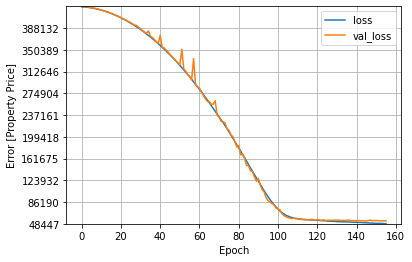

In [183]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    min_y = min(min(history.history['val_loss']),min(history.history['loss'])) - 100
    #max_y = min(max(history.history['val_loss']),max(history.history['loss'])) + 500
    #max_y = min(sorted(history.history['val_loss'])[-3],sorted(history.history['loss'])[-3]) + 100
    max_y = min(sorted(history.history['val_loss'])[-1],sorted(history.history['val_loss'])[-1])
    
    print(max_y - min_y)
    ticks = (max_y - min_y)/10
    print(ticks)
    
    plt.ylim([min_y, max_y])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Property Price]')
    plt.legend()
    plt.grid(True)
    plt.yticks(np.arange(min_y, max_y, ticks))  # JHJH


plot_loss(history)

In [184]:
y_pred = trainable_model.predict(X_test)

138/138 [==============================] - 0s 2ms/step


In [185]:
y_pred = y_pred.reshape((-1, 1))

R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print('-' * 10 + ALGORITHM + '-' * 10)
print('R square Accuracy', R2)
print('Mean Absolute Error Accuracy', MAE)
print('Mean Squared Error Accuracy', MSE)
print('Root Mean Squared Error', RMSE)

----------Neural Network m14 mega----------
R square Accuracy 0.5790951241549422
Mean Absolute Error Accuracy 53123.95746232721
Mean Squared Error Accuracy 4754712208.689863
Root Mean Squared Error 68954.4212410623


In [186]:
if debug_mode:
    print(y_test_index.reshape((-1, 1)).shape);
    print(y_pred.reshape((-1, 1)).shape);
    print(y_test.shape);
    print(y_test_index.shape);
    print(y_pred.shape);
    print(y_test.shape)

In [187]:
compare = np.hstack((y_test_index, y_test, y_pred))
compare_df = DataFrame(compare, columns=['reference', 'actual', 'predicted'])
compare_df['difference'] = abs(compare_df['actual'] - compare_df['predicted'])
compare_df['diff 1 %'] = abs((compare_df['actual'] - compare_df['predicted']) / compare_df['actual'] * 100)
compare_df['diff 2 %'] = abs((compare_df['actual'] - compare_df['predicted']) / compare_df['predicted']) * 100
compare_df['reference'] = compare_df['reference'].astype(int)
compare_df.set_index('reference', inplace=True)
compare_df

,actual,predicted,difference,diff 1 %,diff 2 %
reference,,,,,
85490754,400000.0,374901.50000,25098.50000,6.274625,6.694692
119328242,369950.0,399438.43750,29488.43750,7.970925,7.382474
125716790,350000.0,353437.50000,3437.50000,0.982143,0.972591
122440040,549000.0,507751.03125,41248.96875,7.513473,8.123857
120508103,495000.0,484202.00000,10798.00000,2.181414,2.230061
...,...,...,...,...,...
68620869,475000.0,517882.84375,42882.84375,9.027967,8.280414
85735665,575000.0,554595.12500,20404.87500,3.548674,3.679238
125706338,400000.0,428857.59375,28857.59375,7.214398,6.728945


In [188]:
combined = compare_df.merge(df[columns], how='inner', left_index=True, right_index=True).sort_values(['diff 1 %'],
                                                                                                     ascending=False)
#pd.options.display.float_format = '{:.4f}'.format
combined[['predicted', 'actual', 'Price', 'bedrooms', 'bathrooms']] = combined[
    ['predicted', 'actual', 'Price', 'bedrooms', 'bathrooms']].astype(int)
combined['bedrooms'] = combined['bedrooms'].astype(int)
combined

,actual,predicted,difference,diff 1 %,diff 2 %,Price,bedrooms,bathrooms,nearestStation,location.latitude,location.longitude,latitude_deviation,longitude_deviation,tenure.tenureType
122265818,160000,541632,381632.43750,238.520273,70.459672,160000,3,1,0.166024,51.510420,-0.037730,0.010700,0.066690,FREEHOLD
109722224,108000,336631,228631.09375,211.695457,67.917402,108000,1,1,0.302667,51.406803,-0.261328,0.092917,0.156908,LEASEHOLD
85667184,122000,340392,218392.65625,179.010374,64.159039,122000,1,1,0.838896,51.540462,-0.280301,0.040742,0.175881,LEASEHOLD
83639617,190000,484527,294527.87500,155.014671,60.786570,190000,2,2,0.162816,51.491264,0.064660,0.008456,0.169080,LEASEHOLD
123427112,175000,386651,211651.21875,120.943554,54.739571,175000,1,1,0.069943,51.501222,0.060959,0.001502,0.165379,LEASEHOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123258437,345000,344974,25.65625,0.007437,0.007437,345000,1,1,0.321471,51.622997,-0.110002,0.123277,0.005582,SHARE_OF_FREEHOLD
124695785,367500,367474,25.31250,0.006888,0.006888,367500,2,2,0.245175,51.512844,0.013581,0.013124,0.118001,LEASEHOLD
119867180,550000,550020,20.81250,0.003784,0.003784,550000,3,1,0.432484,51.606530,-0.009760,0.106810,0.094660,FREEHOLD
118956896,550000,549991,8.43750,0.001534,0.001534,550000,3,2,0.178909,51.580658,-0.227254,0.080938,0.122834,LEASEHOLD


138/138 [==============================] - 0s 2ms/step


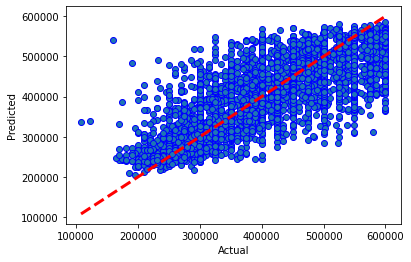

In [189]:
fig, ax = plt.subplots()
#ax.scatter(y_test, best_estimator_pipe.predict(X_test), edgecolors=(0, 0, 1))
ax.scatter(y_test, trainable_model.predict(X_test), edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
#ax.title.set_text(f'CV Chosen best option ({calculated_best_pipe[1]})')
plt.show()


<code style="background:blue;color:blue">**********************************************************************************************************</code>

## Stage: Evaluate the model



In [190]:
#cv_best_model_fit_time = cv_results_df_sorted.iloc[0]["mean_fit_time"] if not_catboost else 999
#cv_best_model_fit_time = 999
cv_best_model_fit_time = estimated_time

DD2 = "(" + ",".join(DATA_DETAIL) + ")" if len(DATA_DETAIL) >= 1 else ""
key = f'{ALGORITHM} (v{VERSION})'.lower()

method = f"{ALGORITHM_DETAIL}{DD2}"

new_results = {
    #'_score': score,
    '_score': R2,
    'R square Accuracy': R2,
    'Mean Absolute Error Accuracy': MAE * price_divisor,
    'Mean Squared Error Accuracy': MSE * price_divisor,
    'Root Mean Squared Error': RMSE * price_divisor,
    '_train time': cv_best_model_fit_time,
    'random_state': RANDOM_STATE,
    'date': str(datetime.now()),
    #'_params': crossval_runner.best_params_ if not_catboost else cat_params,
    #'_params': 'not available', # REPLACED - can't have different models all saying params not available
    '_params': ALGORITHM_DETAIL,
    '_method': more_detail, #ALGORITHM_DETAIL,
    'run_env': run_env
}

if run_env not in ['colab']:
    old_results_json = get_results()
    try:
        old_best_score = old_results_json[key]['best score']
    except:
        print(f"haven't scored this model yet: {ALGORITHM}")
        old_best_score = -999
    this_model_is_best = update_results(old_results_json, new_results, key)

print(key)
print(ALGORITHM_DETAIL)

neural network m14 mega (v10)
mae +epochs=400 +learn=0.0003


In [191]:
if this_model_is_best:
    with open(f'../../../models/optimised_model_{ALGORITHM}_v{VERSION}{DD2}.pkl', 'wb') as f:
        #        if not_catboost:
        #            pickle.dump(crossval_runner.best_estimator_, f)
        #        else:
        #            pickle.dump(starter_model, f)
        pickle.dump(trainable_model, f)
        print('pickled new version of model')
        print(f"{old_results_json[key]['_score']} is new best score (it's better than {old_best_score})")
        #print(results_json[key]['_score'], 'is an improvement on', results_json[key]['second best score'])
else:
    print("not updated saved model, the previous run was better")
    print(old_results_json[key]['_score'], 'is worse than or equal to', old_best_score)


INFO:tensorflow:Assets written to: ram://130a27fa-defd-41c1-869e-2ea0e2da8615/assets
pickled new version of model
0.5790951241549422 is new best score (it's better than 0.5780251176662365)


In [192]:
'''
Notes - current model (mega 12)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 dense_16 (Dense)            (None, 128)               2816

 dense_17 (Dense)            (None, 256)               33024

 dense_18 (Dense)            (None, 512)               131584

 dense_19 (Dense)            (None, 1024)              525312

 dense_20 (Dense)            (None, 1024)              1049600

 dense_21 (Dense)            (None, 512)               524800

 dense_22 (Dense)            (None, 256)               131328

 dense_23 (Dense)            (None, 1)                 257

=================================================================
Total params: 2,398,721
Trainable params: 2,398,721
Non-trainable params: 0
_________________________________________________________________
'''

'\nNotes - current model (mega 12)\n\nModel: "sequential_2"\n_________________________________________________________________\n Layer (type)                Output Shape              Param #\n=================================================================\n dense_16 (Dense)            (None, 128)               2816\n\n dense_17 (Dense)            (None, 256)               33024\n\n dense_18 (Dense)            (None, 512)               131584\n\n dense_19 (Dense)            (None, 1024)              525312\n\n dense_20 (Dense)            (None, 1024)              1049600\n\n dense_21 (Dense)            (None, 512)               524800\n\n dense_22 (Dense)            (None, 256)               131328\n\n dense_23 (Dense)            (None, 1)                 257\n\n=================================================================\nTotal params: 2,398,721\nTrainable params: 2,398,721\nNon-trainable params: 0\n_________________________________________________________________\n'

In [193]:
'''
Notes - older models

Model m1
Model: "sequential_3"

_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 dense_6 (Dense)             (None, 11)                132       
 normalization_3 (Normalizat  (None, 11)               23        
 ion)                                                            
 dense_7 (Dense)             (None, 1)                 12        
=================================================================
Total params: 167
Trainable params: 144
Non-trainable params: 23
_________________________________________________________________


Model m2
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_14 (Dense)            (None, 11)                132       
 normalization_6 (Normalizat  (None, 11)               23        
 ion)                                                            
 dense_15 (Dense)            (None, 11)                132       
 dense_16 (Dense)            (None, 1)                 12        
                                                                 
=================================================================
Total params: 299
Trainable params: 276
Non-trainable params: 23
_________________________________________________________________


Model m3
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_17 (Dense)            (None, 11)                132       
                                                                 
 normalization_7 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 30)                360       
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
=================================================================
Total params: 546
Trainable params: 523
Non-trainable params: 23
_________________________________________________________________
'''

print()